In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph
import os
import sys

In [2]:
sys.path.append("../")
test_dir = os.path.abspath("../tests")
sys.path.append(test_dir)

In [3]:
from job_scheduler.scheduler import JobScheduler

In [4]:
schedule_json = \
{
    "directed": True,
    "nodes": [
        {"id": "start"},
        {"id": "J411"},
        {"id": "J421"},
        {"id": "J422"},
        {"id": "J111"},
        {"id": "J121"},
        {"id": "J112"},
        {"id": "J122"},
        {"id": "J123"},
        {"id": "J511"},
        {"id": "J512"},
        {"id": "J513"},
        {"id": "J514"},
        {"id": "J521"},
        {"id": "J522"},
        {"id": "J523"},
        {"id": "J524"},
        {"id": "J311"},
        {"id": "J312"},
        {"id": "J321"},
        {"id": "J211"},
        {"id": "J212"},
        {"id": "J213"},
        {"id": "J214"},
        {"id": "J215"},
        {"id": "J221"},
    ],
    "links": [
        {"source": "start", "target": "J411", "weight": 2},
        {"source": "start", "target": "J421", "weight": 2},
        {"source": "J411", "target": "J422", "weight": 2},
        {"source": "J421", "target": "J422", "weight": 0},
        {"source": "J422", "target": "J111", "weight": 2},
        {"source": "J422", "target": "J121", "weight": 2},
        {"source": "J111", "target": "J112", "weight": 2},
        {"source": "J121", "target": "J122", "weight": 2},
        {"source": "J122", "target": "J112", "weight": 0},
        {"source": "J112", "target": "J123", "weight": 2},
        {"source": "J123", "target": "J511", "weight": 2},
        {"source": "J123", "target": "J521", "weight": 2},
        {"source": "J511", "target": "J512", "weight": 2},
        {"source": "J521", "target": "J522", "weight": 2},
        {"source": "J512", "target": "J513", "weight": 2},
        {"source": "J522", "target": "J523", "weight": 2},
        {"source": "J513", "target": "J514", "weight": 2},
        {"source": "J523", "target": "J524", "weight": 2},
        {"source": "J514", "target": "J311", "weight": 2},
        {"source": "J524", "target": "J321", "weight": 2},
        {"source": "J311", "target": "J312", "weight": 1},
        {"source": "J321", "target": "J312", "weight": 0},
        {"source": "J312", "target": "J221", "weight": 1},
        {"source": "J312", "target": "J211", "weight": 2},
        {"source": "J211", "target": "J212", "weight": 2},
        {"source": "J221", "target": "J213", "weight": 2},
        {"source": "J213", "target": "J215", "weight": 2},
        {"source": "J212", "target": "J214", "weight": 2},
    ]
}

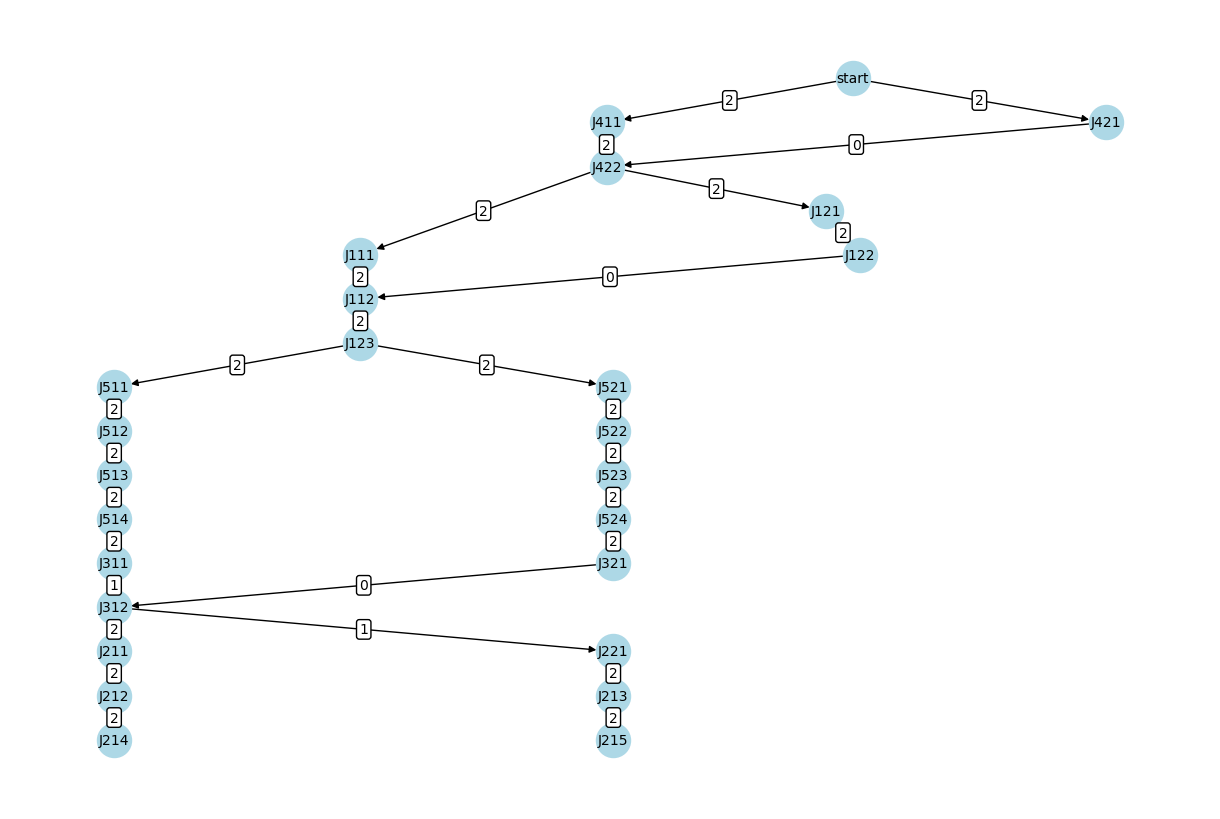

In [5]:
schedule = JobScheduler.load_graph(schedule_json)
JobScheduler.visualize_schedule(schedule)